In [1]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("ChIPpeakAnno")
library(ChIPpeakAnno)

Loading required package: grid
Loading required package: IRanges
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading required package: stats4

In [2]:
library(yaml)
rel_path = "/home/sergio/media"

In [3]:
tlx_list <- yaml.load_file("tracks/TLX3_TLX3_list.yaml")

In [4]:
tlx_peaks <- paste(rel_path, tlx_list$peaks[1], sep = "")
tlx_peaks

[1] "/home/sergio/media/NAS4/PFlab/TLX3_project/ChiP-Seq/TLX3/051peak_merge/TLX3_TLX3_summits.bed"

In [5]:
tlx_gr <- toGRanges(tlx_peaks, format="BED", header=FALSE) 

In [6]:
tlx_gr[1:2]

GRanges object with 2 ranges and 1 metadata column:
                   seqnames             ranges strand |     score
                      <Rle>          <IRanges>  <Rle> | <numeric>
  TLX3_TLX3_peak_1     chr1 [6363293, 6363293]      * |  49.73278
  TLX3_TLX3_peak_2     chr1 [6443751, 6443751]      * | 116.91567
  -------
  seqinfo: 26 sequences from an unspecified genome; no seqlengths

In [7]:
rag_list <- yaml.load_file("tracks/RAG_TLX3_list.yaml")

In [8]:
rag_peaks <- paste(rel_path, rag_list$peaks[1], sep = "")
rag_peaks

[1] "/home/sergio/media/NAS4/PFlab/TLX3_project/ChiP-Seq/RAG_DN/05peak/RAG_TLX3_repl1_summits.bed"

In [9]:
rag_gr <- toGRanges(rag_peaks, format="BED", header=FALSE) 

Warning message in file(file, "rt"):
"cannot open file '/home/sergio/media/NAS4/PFlab/TLX3_project/ChiP-Seq/RAG_DN/05peak/RAG_TLX3_repl1_summits.bed': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


In [11]:
rag_gr[1:2]

GRanges object with 2 ranges and 1 metadata column:
                        seqnames               ranges strand |     score
                           <Rle>            <IRanges>  <Rle> | <numeric>
  RAG_TLX3_repl1_peak_1     chr1 [63223320, 63223320]      * |  92.73306
  RAG_TLX3_repl1_peak_2     chr1 [64579299, 64579299]      * |  59.72068
  -------
  seqinfo: 18 sequences from an unspecified genome; no seqlengths

Missing totalTest! totalTest is required for HyperG test. 
If totalTest is missing, pvalue will be calculated by estimating 
the total binding sites of encoding region of human.
totalTest = humanGenomeSize * (2%(codingDNA) + 
             1%(regulationRegion)) / ( 2 * averagePeakWidth )
          = 3.3e+9 * 0.03 / ( 2 * averagePeakWidth)
          = 5e+7 /averagePeakWidth


$p.value
     tlx_gr rag_gr       pval
[1,]      1      1 0.01022135

$vennCounts
     tlx_gr rag_gr Counts
[1,]      0      0      0
[2,]      0      1     53
[3,]      1      0   9511
[4,]      1      1      1
attr(,"class")
[1] "VennCounts"


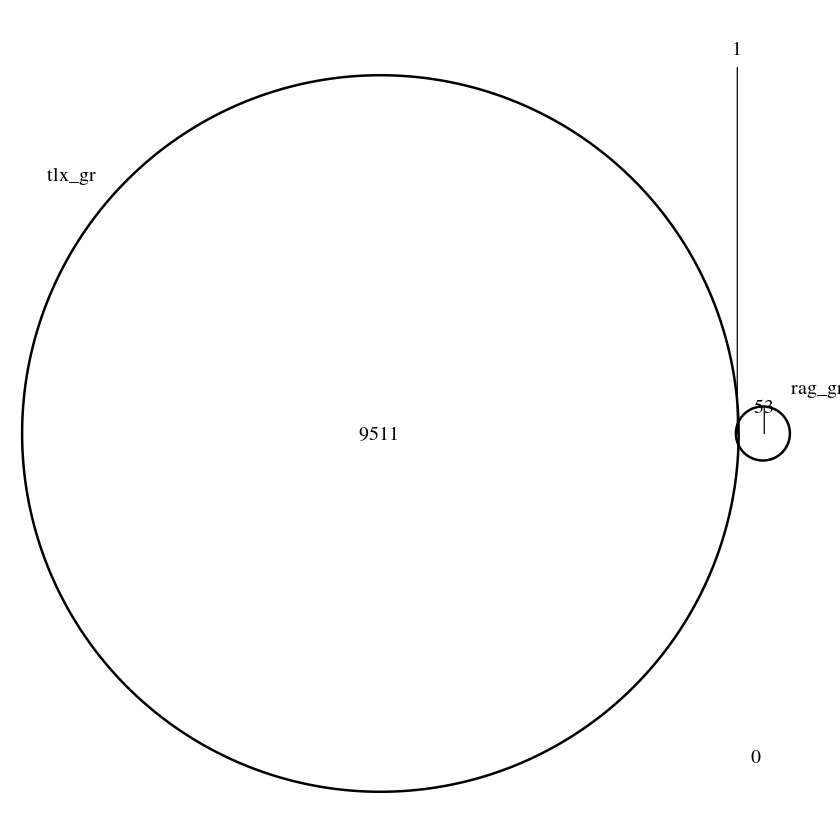

In [12]:
ol <- findOverlapsOfPeaks(tlx_gr, rag_gr)
makeVennDiagram(ol)

In [108]:
## try http:// if https:// URLs are not supported
#source("https://bioconductor.org/biocLite.R")
#biocLite("EnsDb.Hsapiens.v75")
#source("https://bioconductor.org/biocLite.R")
#biocLite("TxDb.Mmusculus.UCSC.mm9.knownGene")
#library(EnsDb.Hsapiens.v75)

## create annotation file from EnsDb or TxDb
library(EnsDb.Mmusculus.v75)
library(GenomicFeatures)
library(TxDb.Mmusculus.UCSC.mm9.knownGene)

annoData <- genes(TxDb.Mmusculus.UCSC.mm9.knownGene)
#annoData <- genes(EnsDb.Mmusculus.v75)

In [110]:
tlx_gr.anno <- annotatePeakInBatch(tlx_gr, AnnotationData=annoData, 
                                    output="overlapping", maxgap=5000L)

In addition to annotating peaks to nearest genes, ChIPpeakAnno can also reports all overlapping and flanking genes by setting output=“both” and maxgap in annotatePeakInBatch. For example, it outputs all overlapping and flanking genes within 5kb plus nearest genes if set maxgap = 5000 and output =“both”.

In [125]:
tlx_gr.anno_both <- annotatePeakInBatch(tlx_gr, AnnotationData=annoData, 
                                    output="both", maxgap=5000)
head(tlx_gr.anno_both)

GRanges object with 6 ranges and 10 metadata columns:
                          seqnames             ranges strand |     score
                             <Rle>          <IRanges>  <Rle> | <numeric>
  TLX3_TLX3_peak_1.620393     chr1 [6363293, 6363293]      * |  49.73278
  TLX3_TLX3_peak_2.240690     chr1 [6443751, 6443751]      * | 116.91567
  TLX3_TLX3_peak_3.240690     chr1 [6509345, 6509345]      * | 309.41519
  TLX3_TLX3_peak_4.170755     chr1 [9797954, 9797954]      * |  16.85537
  TLX3_TLX3_peak_5.170755     chr1 [9823731, 9823731]      * |  24.26228
  TLX3_TLX3_peak_6.170755     chr1 [9873326, 9873326]      * |  56.33292
                                      peak     feature start_position
                               <character> <character>      <integer>
  TLX3_TLX3_peak_1.620393 TLX3_TLX3_peak_1      620393        6349412
  TLX3_TLX3_peak_2.240690 TLX3_TLX3_peak_2      240690        6477312
  TLX3_TLX3_peak_3.240690 TLX3_TLX3_peak_3      240690        6477312
  TLX3_TLX3_

In [89]:
#tlx_gr.anno$gene_name <- 
#    annoData$gene_name[match(tlx_gr.anno$feature,
#                             names(annoData))]

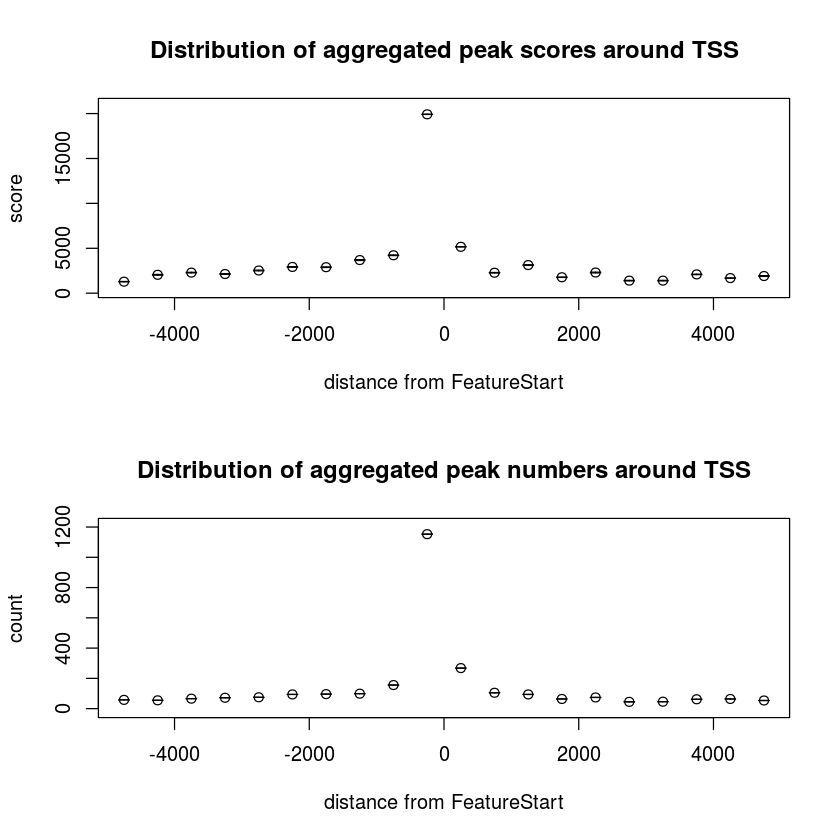

In [111]:
tlx_gr.copy <- tlx_gr
tlx_gr.copy$score <- 1
binOverFeature(tlx_gr, tlx_gr.copy, annotationData=annoData,
               radius=5000, nbins=10, FUN=c(sum, length),
               ylab=c("score", "count"), 
               main=c("Distribution of aggregated peak scores around TSS", 
                      "Distribution of aggregated peak numbers around TSS"))

The distribution of the peaks over exon, intron, enhancer, proximal promoter, 5’ UTR and 3’ UTR can be summarized in peak centric or nucleotide centric view using the function assignChromosomeRegion. Please note that setting nucleotideLevel = TRUE will give a nucleotide level distribution over different features.



Loading required package: FDb.UCSC.tRNAs


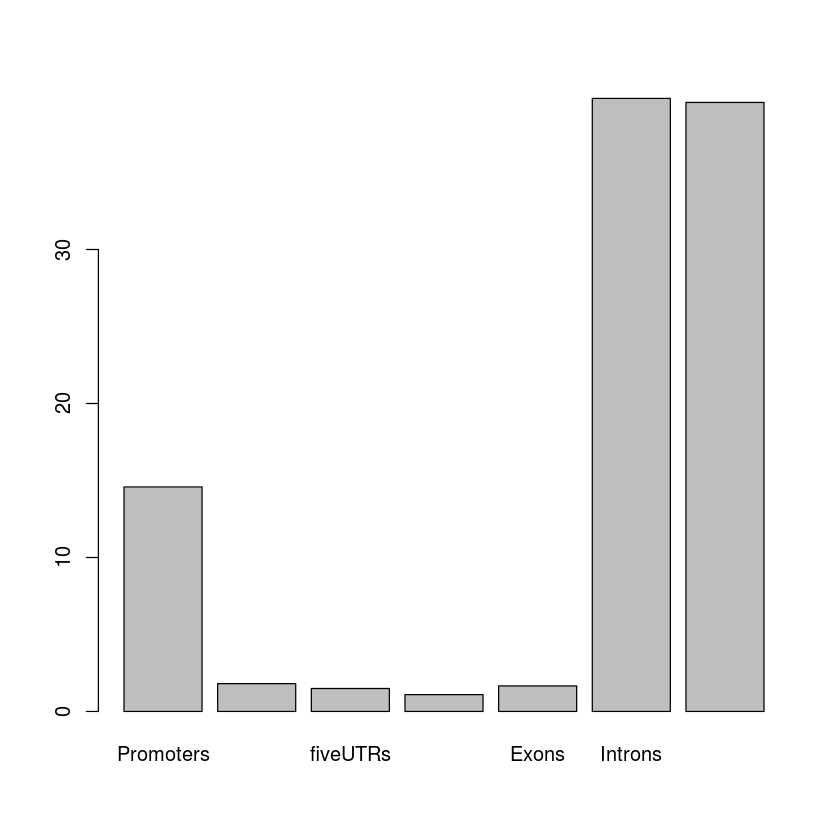

In [123]:
if(require(TxDb.Mmusculus.UCSC.mm9.knownGene)){
    aCR<-assignChromosomeRegion(tlx_gr, nucleotideLevel=FALSE, 
                           precedence=c("Promoters", "immediateDownstream", 
                                         "fiveUTRs", "threeUTRs", 
                                         "Exons", "Introns"), 
                           TxDb=TxDb.Mmusculus.UCSC.mm9.knownGene)
    barplot(aCR$percentage)
}

In [124]:
aCR

$percentage
subjectHits
          Promoters immediateDownstream            fiveUTRs           threeUTRs 
          14.581581            1.808242            1.492851            1.093356 
              Exons             Introns   Intergenic.Region 
           1.661060           39.812868           39.550042 

$jaccard
          Promoters immediateDownstream            fiveUTRs           threeUTRs 
        0.029346423         0.004789848         0.003807193         0.002977642 
              Exons             Introns   Intergenic.Region 
        0.002140607         0.018932235         0.383017586

In [118]:
path <- system.file("extdata", package="ChIPpeakAnno")
files <- dir(path, "bigWig")

In [119]:
files

[1] "TAF.bigWig"   "Tead4.bigWig" "YY1.bigWig"

In [120]:
path

[1] "/home/sergio/R/x86_64-pc-linux-gnu-library/3.2/ChIPpeakAnno/extdata"

ERROR: Error in !ls: invalid argument type
